<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
#!pip install plotly

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [4]:
data = pd.read_csv('Real estate valuation data set.csv').set_index('No')
data.head()

,date,age,nearest MRT station,convenience stores,latitude,longitude,price per unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data



The data is market data of real estate valuation of houses as collected from Sindian Dist., New Taipei City, Taiwan by Prof. I-Cheng Yeh and availed on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set#)

The Features in the data are described in the table below

| Feature | Description |
|---|---|
|date| the year and month of valuation (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)|
|age|the house age in years|
|nearest MRT station|the distance to the nearest Metro Rail Transit (MRT) station (unit: meter)|
|convenience stores|the number of convenience stores close the house (integer)|
|latitude|the geographic coordinate, latitude. (unit: degree)|
|longitude|the geographic coordinate, longitude. (unit: degree)|
|price per unit area|the price of a unit area of the house (10,000 New Taiwan Dollars per Ping, where Ping is a local unit equal to 3.3 meter squared)|




# 2. Objectives


Our target feature is the price per unit area.  
From the data provided, Our main objective is to select the best model to predict future house prices and while identifying the most important features for house valuation in Taiwan.  
The goals leading towards this objective are:
- To inspect the data so as to identify any outliers, additional information or misrepresented data types.
- To clean the data and remove any underlying issues so as to ensure  the data is ready for exploration
- To split the data into a train set and test set
- To briefly explore the distribution of the features and check for multi-collinearitty.
- To identify the feature matrix for model building
- To build the baseline linear regression model and get the base mean absolute error and r-squared score on the train set.
- To build advanced models by incorporating polynomial features and regularization using ridge and lasso, and evaluating their performance using mean_absolute error and r-squared on train set 

- To evaluate all models' out of sample performance using the test set
- To describe the model's performance using charts, scores, and ease of getting feature importance

Our baseline model will be the basic linear regression.  
We will then analyze Ridge, Lasso, Polynomial Regression to identify the best model.
Grid Search will be utilized to select best hyper parameters for each model.

## Inspecting Data

In [5]:
shape = data.shape
print(f'Our data has {shape[1]} features and {shape[0]} observations')

Our data has 7 features and 414 observations


In [6]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 414 non-null    float64
 1   age                  414 non-null    float64
 2   nearest MRT station  414 non-null    float64
 3   convenience stores   414 non-null    int64  
 4   latitude             414 non-null    float64
 5   longitude            414 non-null    float64
 6   price per unit area  414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB
None


,date,age,nearest MRT station,convenience stores,latitude,longitude,price per unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


- All our features are numeric
- The data has no missing values
- The date column includes data on the month of valuation in form of decimal positions


## Data Cleaning

**Data Cleaning Requirements**  
- The date column should be of type integer(int64), but is float type (float64) due to the additional month information, hence:
    - New column for month is required to extract that month information in the date column
    - Type conversion of the date to integer(int64) is required after extracting month data
    - Renaming of date column to year is necessary as the data in the column is year of valuation
- Outliers in our target may influence our model. Thus, we will drop columns with possible outlying target feature values. This will be done by ensuring there is no value greater than one and a half times the interquartile range, in range from the 25<sup>th</sup> percentile.

The data cleaning will all be done using the function `clean_data()`, that will take in our messy data and return clean data.

In [7]:
def clean_data(df: object):
    
    # Create month column
    df['month'] = ((df['date'] % 1) * 12).round().astype(int).replace(0,12)
    
    # Convert date to integer
    df['date'] = df['date'].astype(int)
    
    # Rename date as year
    df.rename(columns= {'date': 'year'}, inplace = True)
    
    # Removing outliers in our target feature
    target = 'price per unit area'
    lower_quartile, upper_quartile = np.quantile(df[target], [0.25,0.75])
    interquartile_range = upper_quartile - lower_quartile
    upper_cutoff = lower_quartile + (1.5 * interquartile_range)
    df = df[df[target] < upper_cutoff]
    
    return df
    

Let us now clean our data

In [8]:
data = clean_data(data)
data.head()

,year,age,nearest MRT station,convenience stores,latitude,longitude,price per unit area,month
No,,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9,11
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2,11
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3,7
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8,6
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1,10


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 1 to 413
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 381 non-null    int64  
 1   age                  381 non-null    float64
 2   nearest MRT station  381 non-null    float64
 3   convenience stores   381 non-null    int64  
 4   latitude             381 non-null    float64
 5   longitude            381 non-null    float64
 6   price per unit area  381 non-null    float64
 7   month                381 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 26.8 KB


### Train-Test Split

We split our data into a test set and a train set before exploration to prevent any bias in our modelling.

In [10]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 4)

In [11]:
shapes = (f"Shape of train_data: {train_data.shape}\n"
          f"Shape of test_data: {test_data.shape}\n"
          )
print(shapes)

Shape of train_data: (304, 8)
Shape of test_data: (77, 8)



## Data Exploration

For Exploration, we will check the statistical summary and basic distributions of our features

In [12]:
train_data.describe()

,year,age,nearest MRT station,convenience stores,latitude,longitude,price per unit area,month
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,2012.694079,18.321053,1168.852675,3.891447,24.968331,121.532760,35.506908,6.342105
std,0.461556,10.990858,1298.649252,2.884703,0.012872,0.015839,11.208989,3.436564
min,2012.000000,0.000000,23.382840,0.000000,24.932070,121.475160,7.600000,1.000000
25%,2012.000000,11.975000,323.682150,1.000000,24.962038,121.518370,26.500000,4.000000
50%,2013.000000,16.200000,531.626650,4.000000,24.969130,121.538430,37.000000,6.000000
75%,2013.000000,29.150000,1712.632000,6.000000,24.978388,121.543222,44.050000,9.000000
max,2013.000000,42.700000,6396.283000,10.000000,25.014590,121.566270,55.900000,12.000000


We will use seaborn's whitegrid style for our graphs

In [13]:
sns.set(style='whitegrid')

### Distribution of features 

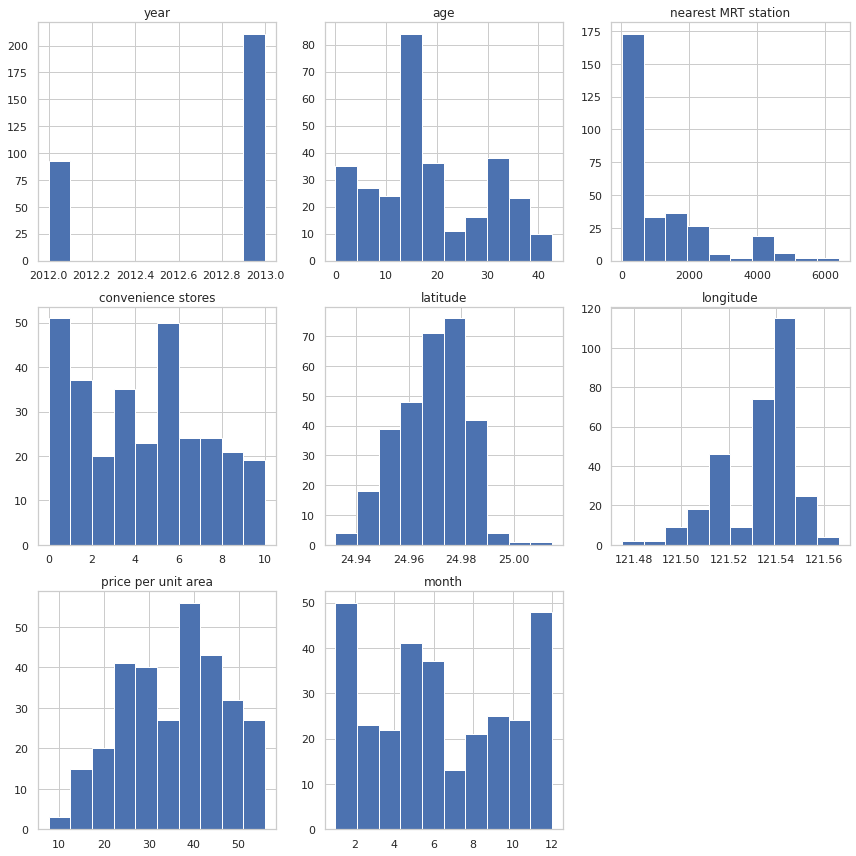

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
train_data.hist(ax=ax)
plt.tight_layout()
plt.show()

- The year column is a categorical variable. It has two categories, 2012 and 2013.This means that the valuation of these houses happened in 2012 and 2013.
    - Year is a low cardinality feature but is considered based on the additional infomation it may carry when combined with the month feature. (for interpretation)
- Most houses are located at most 2000 meters(2 Kilometers) away from an MRT station.
- The most common price region per unit area is between 200,000 and 500,000 Taiwanese Dollars

## Data Preprocessing For Model


### Feature Selection 

price per unit area is our target feature

In [15]:
target = 'price per unit area'
y_train = train_data[target]
y_test = test_data[target]

All other columns but price per unit area are part of the feature matrix.  

In [16]:
Features = []
for column in data.columns:
    if column != target:
        Features.append(column)
        
Features

['year',
 'age',
 'nearest MRT station',
 'convenience stores',
 'latitude',
 'longitude',
 'month']

In [17]:
X_train = train_data[Features]
X_test = test_data[Features]

### Defining Cross Validation Split using KFold

To ensure the cross validation is uniform across all models, we will use KFold to produce the uniform cross validation selection. 

In [18]:
kf = KFold(n_splits = 3, shuffle = True, random_state = 42)

In [19]:
def visualize(actual, predicted, dataframe = None):
    """Make regression and residual plots of the data
    
    Arguments:
        actual: pd.Series/np.array -> array of actual values
        predicted: pd.Series/np.array -> array of predicted values
        Optional argument:
            dataframe: Options are 'Train', 'Test', None. Default is None 
                       -> state the type of data
    Returns:
        plot_1 -> Regression plot
        plot_2 -> Residuals' plot
    """
    try:
        dataframe = f'{dataframe.title()} '
    except:
        dataframe = ''
    # Matplotlib style
    mpl.style.use("seaborn-dark")
    mpl.style.use('tableau-colorblind10')
    # Create figure and axes
    fig, axes = plt.subplots(2,figsize=(15,12))
    
    ax1,ax2 = axes
    # Create Regression plot
    sns.regplot(x = actual, y = predicted, ax=ax1)
    #ax1.plot([actual.min(), actual.max()], 
    #        [actual.min(), actual.max()], 
    #        "k--", lw=4,
    #        label = 'Regression Line'
    #       )

    ax1.set_xlabel("Actual Values")
    ax1.set_ylabel("Predicted Values")
    ax1.set_title(f"Regression Plot of Predicted vs Actual Values for {dataframe}Data")
    plot_1 = ax1

    # Create Residual plot
    sns.residplot(x = actual, 
                  y = predicted, 
                  color = 'green', ax=ax2,
                  lowess=True, line_kws=dict(color="r")
                 )
    ax2.set_xlabel("Actual Values")
    ax2.set_ylabel("Predicted Values")
    ax2.set_title(f"Residuals for Predicted Values vs Actual Values for {dataframe}Data")
    plt.tight_layout()
    plot_2 = ax2
    
    return plot_1, plot_2

# 3. Linear Regression Models

## Training

### Baseline - Simple Linear Regression

- Our baseline model is the Simple Linear Regression Model. 
- We will select the model that best improves upon performance from this baseline.  
- Mean Absolute Error(MAE) is used for evaluation

In [20]:
steps = [
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
]
lr_model = Pipeline(steps).fit(X_train,y_train)
y_pred_baseline =  lr_model.predict(X_train)
lr_score = mean_absolute_error(y_pred_baseline, y_train).round(4)
print(f'Baseline MAE on Train Set is {lr_score}')

Baseline MAE on Train Set is 4.8409


### Linear regression with Polynomial Features

Polynomial regression is done using GridSearch. This will help to select best polynomial degree using CrossValidation.  
The best polynomial degree will be used for Ridge Regression and Lasso Regression.  

In [21]:
steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', LinearRegression())
]
lr_poly = Pipeline(steps)
params = {
    "poly__degree": [2,3,4]
}
grid_poly = GridSearchCV(lr_poly,params, cv = kf).fit(X_train, y_train)
y_pred_polyLR =  grid_poly.predict(X_train)
lr_poly_score = mean_absolute_error(y_pred_polyLR, y_train).round(4)
print(f'Polynomial Regression MAE on Train Set is {lr_poly_score}')

Polynomial Regression MAE on Train Set is 3.9157


In [22]:
grid_poly.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('ridge', LinearRegression())])

The best polynomial degree is **2**

### Ridge with Polynomial Features

Ridge Regression with Polynomial order of **2**

In [23]:
steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
]
ridge_model = Pipeline(steps)

params = {
    'ridge__solver': ['auto', 'sag', 'saga', 'lsqr'],
    'ridge__alpha' : np.logspace(-20, -2, 40)
}
grid_ridge = GridSearchCV(ridge_model, params, cv = kf).fit(X_train, y_train)
y_pred_ridge = grid_ridge.predict(X_train)
ridge_score = mean_absolute_error(y_pred_ridge, y_train).round(4)
print(f'Ridge Regression MAE on Train Set is {ridge_score}')

Ridge Regression MAE on Train Set is 3.9142


### Lasso with Polynomial Features

Lasso Regression with Polynomial order of **2**

In [24]:
steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 2)),
    ('lasso', Lasso())
]
lasso_model = Pipeline(steps)

params = {
    'lasso__alpha' : np.arange(0.01, 1, 0.1)
}
grid_lasso = GridSearchCV(lasso_model, params, cv = kf).fit(X_train, y_train)
y_pred_lasso = grid_lasso.predict(X_train)
lasso_score = mean_absolute_error(y_pred_lasso, y_train).round(4)
print(f'Lasso Regression MAE on Train Set is {lasso_score}')

Lasso Regression MAE on Train Set is 3.8971


### The models' performance on Train Set

In [25]:
train_performance = pd.Series({
    "Model":"MAE Score",
    "Baseline Linear Regression": lr_score,
    "Polynomial Linear Regression": lr_poly_score,
    "Ridge Regression": ridge_score,
    "Lasso Regression": lasso_score
    
})
train_performance

Model                           MAE Score
Baseline Linear Regression         4.8409
Polynomial Linear Regression       3.9157
Ridge Regression                   3.9142
Lasso Regression                   3.8971
dtype: object

## Model Evaluation

In [26]:
yhat_base = lr_model.predict(X_test)
lr_test_score = mean_absolute_error(yhat_base, y_test).round(4)
print(f'Linear Regression MAE on Test Set is {lr_test_score}')

Linear Regression MAE on Test Set is 5.3413


In [27]:
yhat_poly = grid_poly.predict(X_test)
poly_test_score = mean_absolute_error(yhat_poly, y_test).round(4)
print(f'Polynomial Regression MAE on Test Set is {poly_test_score}')

Polynomial Regression MAE on Test Set is 4.4144


In [28]:
yhat_ridge = grid_ridge.predict(X_test)
ridge_test_score = mean_absolute_error(yhat_ridge, y_test).round(4)
print(f'Ridge Regression MAE on Test Set is {ridge_test_score}')

Ridge Regression MAE on Test Set is 4.4145


In [29]:
yhat_lasso = grid_lasso.predict(X_test)
lasso_test_score = mean_absolute_error(yhat_lasso, y_test).round(4)
print(f'Lasso Regression MAE on Test Set is {lasso_test_score}')

Lasso Regression MAE on Test Set is 4.3807


### The models' performance on Test Set

In [30]:
test_performance = pd.Series({
    "Model":"MAE Score",
    "Baseline Linear Regression": lr_test_score,
    "Polynomial Linear Regression": poly_test_score,
    "Ridge Regression": ridge_test_score,
    "Lasso Regression": lasso_test_score
    
})
test_performance

Model                           MAE Score
Baseline Linear Regression         5.3413
Polynomial Linear Regression       4.4144
Ridge Regression                   4.4145
Lasso Regression                   4.3807
dtype: object

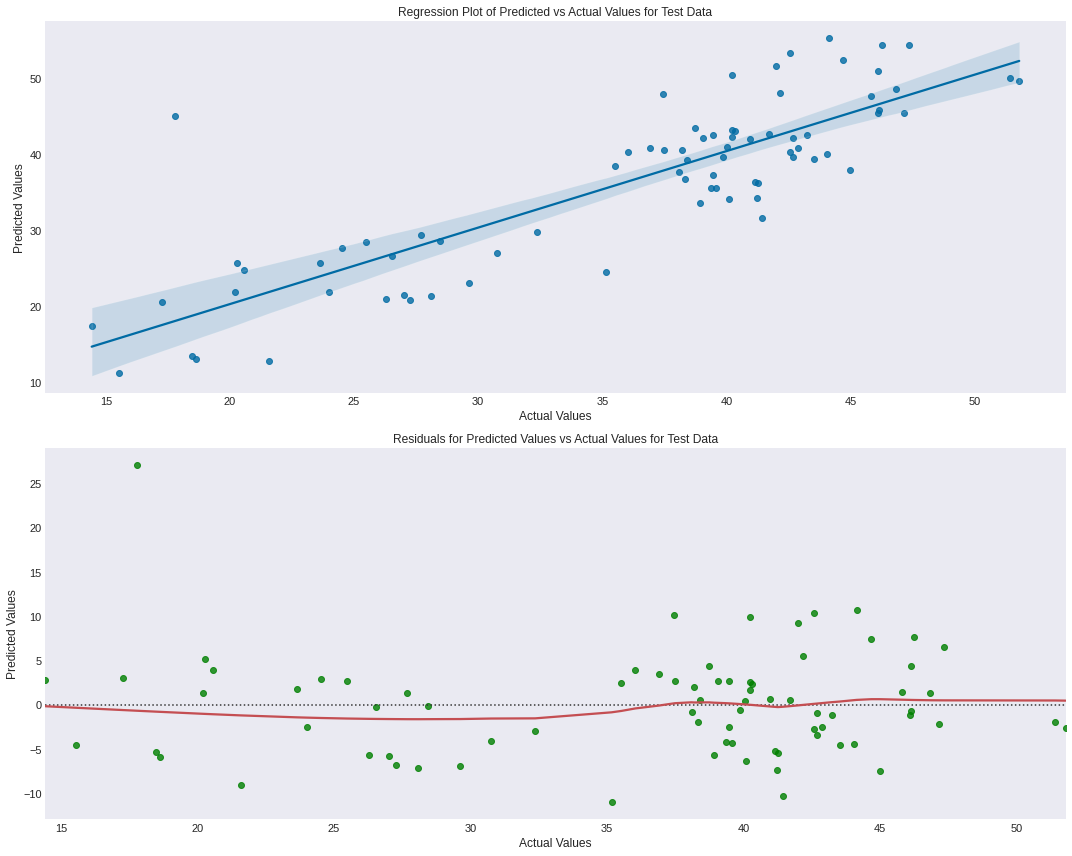

In [31]:
visualize(yhat_lasso, y_test, "Test");

# 4. Insights and key findings


In [56]:
def visualize2(actual, predicted, dataframe = None):
    """Make regression and residual plots of the data using plotly express
    
    Arguments:
        actual: pd.Series/np.array -> array of actual values
        predicted: pd.Series/np.array -> array of predicted values
        Optional argument:
            dataframe: Options are 'Train', 'Test', None. Default is None 
                       -> state the type of data
    Returns:
        plot_1 -> Regression plot
        plot_2 -> Residuals' plot
    """
    try:
        dataframe = f'{dataframe.title()} '
    except:
        dataframe = ''
    
    
   
    # Create Regression plot
    x_range = np.linspace(actual.min(), actual.max(), 100)
    y_range = predicted
    
    fig1 = px.scatter(x= actual, y=predicted, opacity=0.65, 
                      trendline='ols', trendline_color_override='darkblue')
    
    fig1.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
    fig1.update_layout(
        title=f"Regression Plot of Predicted vs Actual Values for {dataframe}Data",
        xaxis_title="Actual Values",
        yaxis_title="Predicted Values"
    )
    
    # Create Residual plot
    residuals = np.asarray(predicted) - np.asarray(actual)
    
    fig2 = px.scatter(
        x=actual, y=residuals,
        trendline='ols'
    )
    fig2.update_layout(
        title=f"Residuals for Predicted Values vs Actual Values for {dataframe}Data",
        xaxis_title="Actual Values",
        yaxis_title="Residual Values"
    )
    
    return fig1.show(), fig2.show()

In [58]:
visualize2(y_test, yhat_lasso, "Test")

(None, None)

# 5. Next Steps


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
